0.11336992421308277
30.212997495461888 -0.013153196607908542
klas is  0.004
c_out is  0.06823093134667563
c_out is  0.11319986932676315
height is  0.003170455334617889
Warning!: guessed length is not equal to the height. Double check your result 0.0015853490072510025 0.003170455334617889
the new eff is  0.0014999999999999458
0.10480187464121846
28.085321615499783 0.10953639626951875
klas is  0.004
c_out is  0.06405139497015644
c_out is  0.10464467182925663
height is  0.0029367403548658725


c:\Users\Gabriele\anaconda3\envs\testenv\Lib\site-packages\TRIOMA\tools\Extractors\extractor.py:154: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(toint, c_out, c_in, points=c_out_max, maxp1=1e3)
c:\Users\Gabriele\anaconda3\envs\testenv\Lib\site-packages\TRIOMA\tools\Extractors\extractor.py:343: OptimizeWarning: Unknown solver options: xatol, fatol
  c_out = minimize(


Warning!: guessed length is not equal to the height. Double check your result 0.0014706938046875602 0.0029367403548658725
the new eff is  0.0014999999999999458
0.09686075552583201
29.361927143477047 0.040761874082050946
klas is  0.004
c_out is  0.05820004404302959
c_out is  0.09671546439254326
height is  0.0030673724673725713
Warning!: guessed length is not equal to the height. Double check your result 0.0015364799213060912 0.0030673724673725713
the new eff is  0.0014999999999999458
0.12413223038261967
42.5535175992421 0.4705005645623697
klas is  0.004
c_out is  0.08965105527633643
c_out is  0.12394603203704574
height is  0.004456666986827084
Warning!: guessed length is not equal to the height. Double check your result 0.002230194113651827 0.004456666986827084
the new eff is  0.0014999999999999458
0.13323772780029136
25.957645735537678 -0.009251202008586498
klas is  0.004
c_out is  0.07223221809204984
c_out is  0.13303787120859092
height is  0.002721575022697021
Warning!: guessed lengt

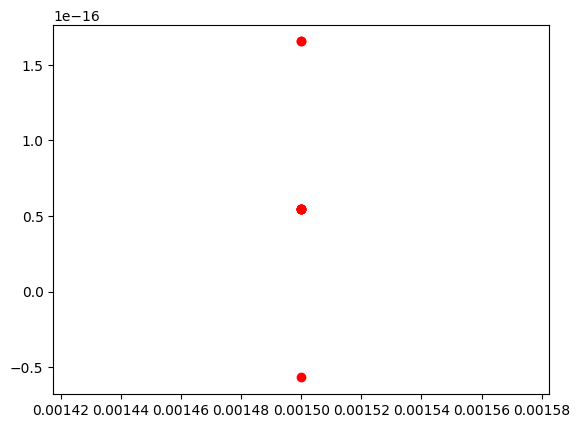

In [1]:

from TRIOMA.tools.Extractors.GasLiquidContactor import GLC,GLC_Gas,Fluid
import numpy as np 
import matplotlib.pyplot as plt
R_const=8.314
T = [673, 673, 673, 673, 713, 713, 713, 713, 713]
Z = 0.6
R = 0.0547/2
Q_l = [
    71.0    * 1e-3 / 3600,
    66      * 1e-3 / 3600,
    69      * 1e-3 / 3600,
    100     * 1e-3 / 3600,
    61      * 1e-3 / 3600,
    68      * 1e-3 / 3600,
    68      * 1e-3 / 3600,
    100     * 1e-3 / 3600,
    70      * 1e-3 / 3600,
]
Q_gas = [
    3 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    9 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    3 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    9 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
]
p_in = [1085, 1003, 927, 1188, 1258, 1152, 1158, 1228, 2490]
p_out = [653, 613, 557, 858, 682, 670, 612, 712, 1215]
B_vec = []
kl_vec = []
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=0,p_tot=1.5E5)
    
    Flibe=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=True )
    c_in=p_in[i]*Flibe.Solubility
    print(c_in)
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]*Flibe.Solubility,fluid=Flibe,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]*Flibe.Solubility)
    [a,b] = Melodie.get_kla_from_cout()
    print(a, b)
    B_vec.append(a)
    kl_vec.append(b)
    eff=0.0015
    Melodie.kla=4E-3
    print("klas is ",Melodie.kla)
    print("c_out is ",Melodie.c_out)    
    Melodie.update_attribute("c_out",Melodie.c_in*(1-eff))
    print("c_out is ",Melodie.c_out)
    height=Melodie.get_z_from_eff()
    print("height is ",height)
    Melodie.update_attribute("H",height)
    Melodie.get_c_out()
    print("the new eff is ",Melodie.eff)
    err2=eff-Melodie.eff
    plt.scatter(eff,err2,color='red')    


if done correctly the results should be the same as this table
| B         | kla$$10^3$$    |
|-----------|----------------|
| 30.2      | 4.87           |
| 28.0      | 3.92           |
| 29.4      | 4.13           |
| 42.6      | 3.88           |
| 26.0      | 5.06           |
| 28.9      | 4.50           |
| 28.9      | 5.16           |
| 42.6      | 6.99           |
| 29.8      | 6.12           |
| 28.2      | 2.84           |
| 14.1      | 2.12           |
| 14.1      | 1.90           |
| 14.1      | 1.66           |
| 14.1      | 1.73           |

